# Dataset

In [ ]:
# import necessary libraries for pre-processing
import numpy as np
import pandas as pd
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import torch
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# import necessary modules for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

In [ ]:
# set up the environment (GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
# import the first dataset and display it
ar_poems = pd.read_csv("/kaggle/input/arabic-poetry/Arabic_poetry_dataset.csv")
ar_poems.head()

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [ ]:
# import the second dataset and display it
ar_poems1 = pd.read_csv("/kaggle/input/arabic-poetry-dataset-478-2017/all_poems.csv")
ar_poems1.head()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


# EDA:

In [ ]:
print('First dataset exploration:\n\n')
print(ar_poems.info())
print('\n\nSecond dataset exploration:\n\n')
print(ar_poems1.info())

First dataset exploration:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54944 non-null  int64 
 1   category    54944 non-null  object
 2   poet_name   54944 non-null  object
 3   poem_title  54944 non-null  object
 4   poem_text   54944 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


Second dataset exploration:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-n

In [ ]:
# drop useless columns
ar_poems = ar_poems.drop(columns=['id'])
ar_poems1 = ar_poems1.drop(columns=['poem_id','poem_link','poem_style','poet_id','poet_link'])
# rename columns
ar_poems1 = ar_poems1.rename(columns={"poet_cat": "category"})

In [ ]:
print('First dataset exploration: Final Form\n\n')
print(ar_poems.info())
print('\n\nSecond dataset exploration: Final Form\n\n')
print(ar_poems1.info())

First dataset exploration: Final Form


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    54944 non-null  object
 1   poet_name   54944 non-null  object
 2   poem_title  54944 non-null  object
 3   poem_text   54944 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
None


Second dataset exploration: Final Form


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_text   58020 non-null  object
 1   poem_title  58021 non-null  object
 2   category    58021 non-null  object
 3   poet_name   58021 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


In [ ]:
ar_poems.head()

,category,poet_name,poem_title,poem_text
0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [ ]:
ar_poems1.head()

,poem_text,poem_title,category,poet_name
0,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,بدر شاكر السياب
1,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,بدر شاكر السياب
2,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,بدر شاكر السياب
3,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,بدر شاكر السياب
4,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,بدر شاكر السياب


In [ ]:
# explore unique categories in the 1st dataset
ar_poems.category.unique()

array(['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي'], dtype=object)

In [ ]:
# explore unique categories in the 2nd dataset
ar_poems1.category.unique()

array(['العراق', 'سوريا', 'مصر', 'تونس', 'السعودية', 'لبنان', 'فلسطين',
       'اليمن', 'العصر الجاهلي', 'العصر الأندلسي', 'السودان', 'البحرين',
       'العصر الإسلامي', 'العصر العباسي', 'ليبيا', 'عمان', 'المغرب',
       'الجزائر', 'الإمارات', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'شعراء العراق والشام', 'أفغانستان', 'إيران'], dtype=object)

In [ ]:
# concat the 2 initial datasets
frames = [ar_poems, ar_poems1]
result = pd.concat(frames)
# reset index
result.reset_index(drop=True, inplace=True)
#display resulting dataset
print('\nThe entire dataset after merging the two initial datasets is of', len(result),'long.\n\n')
result.head()


The entire dataset after merging the two initial datasets is of 112965 long.




,category,poet_name,poem_title,poem_text
0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [ ]:
# check for duplicates in the result dataset
print('The result dataset contains', len(result[result.duplicated(keep=False)]), 'duplicate rows.\n')
result[result.duplicated(keep=False)]

The result dataset contains 350 duplicate rows.



,category,poet_name,poem_title,poem_text
524,البحرين,قاسم حداد,العنبر,ليس لي من جراحي غير هذا الزجاج الذي يتحدَّرُ \...
525,البحرين,قاسم حداد,العنبر,ليس لي من جراحي غير هذا الزجاج الذي يتحدَّرُ \...
2147,المغرب,أبو الفيض الكتاني,نعمل من لهوى كسوى,نعمل من لهوى كسوى\nومن الثلج والنار حزم\nونشعل...
2148,المغرب,أبو الفيض الكتاني,نور الحق هداني بفضل عطاني,نور الحق هداني بفضل عطاني\nمن حلل كساني يا باب...
2149,المغرب,أبو الفيض الكتاني,أصابني حب الهوى,أصابني حب الهوى\nولم نجد له دوى\nألا فؤادي قد ...
...,...,...,...,...
96188,سوريا,كمال خير بك,هرب,ورايت انك ترحلين بين السطور النازفه ورايت نهدك...
96895,السعودية,أحمد سالم باعطب,السلم في عرفهم,قالت رايت الامس حول حقولنا متسلا هلا رعي حرما...
96896,السعودية,أحمد سالم باعطب,السلم في عرفهم,قالت رايت الامس حول حقولنا متسلا هلا رعي حرما...
96898,السعودية,أحمد سالم باعطب,الحبُّ للقلب,قالت لقد شاخ منك العقل والجسد وغاب عن عزمك ال...


In [ ]:
# remove the 175 duplicates
result.drop_duplicates(inplace=True)
print('\nThe result dataset is of', len(result),'long.\n\n')


The result dataset is of 112790 long.




In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112790 entries, 0 to 112964
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   category    112790 non-null  object
 1   poet_name   112790 non-null  object
 2   poem_title  112790 non-null  object
 3   poem_text   112789 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


In [ ]:
# remove the only row which misses "poem_text"
result.dropna(inplace=True)

In [ ]:
# explore unique categories in the result dataset
result.category.unique()

array(['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي', 'شعراء العراق والشام',
       'أفغانستان', 'إيران'], dtype=object)

In [ ]:
# import nature corpus
nature_list = open("../input/words/nature.txt", "r", encoding="utf-8").read()
nature_words = word_tokenize(nature_list)
# import animals corpus
animals_list = open("../input/words/animals.txt", "r", encoding="utf-8").read()
animal_words = word_tokenize(animals_list)
# import metaphysics corpus
meta_list = open("../input/meta-words/allah.txt", "r", encoding="utf-8").read()
meta_words = word_tokenize(meta_list)
# import war corpus
war_list = open("../input/war_words_arabic/war.txt", "r", encoding="utf-8").read()
war_words = word_tokenize(war_list)

In [ ]:
print('nature-related words are:', nature_list)
print('\nanimals-related words are:', animals_list)
print('\nmeta-related words are:', meta_list)
print('\nwar-related words are:', war_list)

nature-related words are: صواعق بحر بحار نجوم نجم سماء سحاب السحب جبل غصن شجر صحراء غابة حقل وردة ورود أزهار زهرة صخر حجر كوكب مجرة رياح نار شمس قمر شموس أقمار ثلج صيف شتاء خريف ربيع مطر رعد برق جبال

animals-related words are: فراشة اسد ثعلب ثعالب اسود حشرة وحش نملة نحلة فراشة فراشات نمر كلب فيل زرافة ذئب خروف خراف نعجة نعاج بقرة ثور جمل ناقة كلاب قطة هرة هرر ضبع ضباع خنزير خنازير حمار انعام حمير غزال غزلان حوت قرد قرود الخيل الخيول الفرس حصان جياد شبل جرو طائر عصفور عصافير طير طيور دجاج ارنب عنكبوت دب نسر تمساح جراد عقرب فأر ضفدع بلبل صقر سمك أسماك

meta-related words are: الله جن ملائكة ملاك شيطان ابليس جنة نار فردوس نبي رسول جهنم قيامة بعث جحيم إله وحي الرحمن

war-related words are: صراع عراك غارة قتال قتل مأزق معركة معمعة ملحة ملحمة موقعة معترك مقتتل نزال هيجاء وغى وقيعة وقعة حرب


In [ ]:
# define a function that counts the number of occurrences of a specific corpus' words in a list of poems
def count_words(words, poems):
    freq = 0
    for word in words:
        for poem in poems:
            if word in poem:
                freq += 1
    return freq

In [ ]:
# store all poem texts in a list
ar_poems_text = list(result['poem_text'])
# get the number of occurrences for each of the imported corpora's words in all poems
nature_freq = count_words(nature_words, ar_poems_text)
animals_freq = count_words(animal_words, ar_poems_text)
meta_freq = count_words(meta_words, ar_poems_text)
war_freq = count_words(war_words, ar_poems_text)

In [ ]:
print('There is', nature_freq, 'nature-related words,', war_freq, 'war-related words', animals_freq, 'animals-related words, and',
      meta_freq, 'Metaphysics-related words in the dataset.')

There is 108283 nature-related words, 14509 war-related words 59957 animals-related words, and 75476 Metaphysics-related words in the dataset.


## الشعر الجاهلي - Jahli Era Poetry (pre-islam)

In [ ]:
# store the "jahli" poems into a list
jahli_df = result.loc[result['category'] == "العصر الجاهلي"]
jahli_text = list(jahli_df['poem_text'])
# get the number of occurrences for each of the imported corpora's words in "jahli" poems
jahli_nature_freq = count_words(nature_words, jahli_text)
jahli_animals_freq = count_words(animal_words, jahli_text)
jahli_meta_freq = count_words(meta_words, jahli_text)
jahli_war_freq = count_words(war_words, jahli_text)

In [ ]:
# compute the rate of the existence of each corpora's words in "jahli" examples
jahli_rate_animal = jahli_animals_freq/len(jahli_df)
jahli_rate_nature = jahli_nature_freq/len(jahli_df)
jahli_rate_meta = jahli_meta_freq/len(jahli_df)
jahli_war_rate = jahli_war_freq/len(jahli_df)

print("The number of repetitions of animal-related words in jahli-era poetry is", jahli_animals_freq, 'times, with an average of', jahli_rate_animal)
print("The number of repetitions of nature-related words in jahli-era poetry is", jahli_nature_freq, 'times, with an average of', jahli_rate_nature)
print("The number of repetitions of metaphysics-related words in jahli-era poetry is", jahli_meta_freq, 'times, with an average of', jahli_rate_meta)
print("The number of repetitions of war-related words in jahli-era poetry is", jahli_war_freq, 'times, with an average of', jahli_war_rate)

The number of repetitions of animal-related words in jahli-era poetry is 1344 times, with an average of 0.40275696733593047
The number of repetitions of nature-related words in jahli-era poetry is 1238 times, with an average of 0.3709919089002098
The number of repetitions of metaphysics-related words in jahli-era poetry is 980 times, with an average of 0.293676955349116
The number of repetitions of war-related words in jahli-era poetry is 442 times, with an average of 0.13245430026970334


## Islamic Era - الشعر في العصر الإسلامي


In [ ]:
# store the "islamic" poems into a list
islamic_df = result.loc[result['category'] == "العصر الإسلامي"]
islamic_text = list(islamic_df['poem_text'])
# get the number of occurrences for each of the imported corpora's words in "islamic" poems
islamic_animals_freq = count_words(animal_words, islamic_text)
islamic_nature_freq = count_words(nature_words, islamic_text)
islamic_meta_freq = count_words(meta_words, islamic_text)
islamic_war_freq = count_words(war_words, islamic_text)

In [ ]:
# compute the rate of the existence of each corpora's words in "islamic" examples
islamic_rate_animal = islamic_animals_freq/len(islamic_df)
islamic_rate_nature = islamic_nature_freq/len(islamic_df)
islamic_rate_meta = islamic_meta_freq/len(islamic_df)
islamic_war_rate = islamic_war_freq/len(islamic_df)

print("The number of repetitions of animal-related words in islamic-era poetry is", islamic_animals_freq, 'times, with an average of', islamic_rate_animal)
print("The number of repetitions of nature-related words in islamic-era poetry is", islamic_nature_freq, 'times, with an average of', islamic_rate_nature)
print("The number of repetitions of meta-related words in islamic-era poetry is", islamic_meta_freq, 'times, with an average of', islamic_rate_meta)
print("The number of repetitions of war-related words in islamic-era poetry is", islamic_war_freq, 'times, with an average of', islamic_war_rate)

The number of repetitions of animal-related words in islamic-era poetry is 2254 times, with an average of 0.5763231909997443
The number of repetitions of nature-related words in islamic-era poetry is 2766 times, with an average of 0.7072360010227563
The number of repetitions of meta-related words in islamic-era poetry is 1810 times, with an average of 0.4627972385579136
The number of repetitions of war-related words in islamic-era poetry is 801 times, with an average of 0.20480695474303248


## Andalus Era - الشعر في العصر الأندلسي

In [ ]:
# store the "andalus" poems into a list
andalus_df = result.loc[result['category'] == "العصر الأندلسي"]
andalus_df

,category,poet_name,poem_title,poem_text
42648,العصر الأندلسي,ابن حيوس,طيف ألم قبيل منصدع الضيا,طَيفٌ ألمَّ قُبَيْل منصدعِ الضيا\nليثير من وجد...
42649,العصر الأندلسي,ابن حيوس,أما وبديع ما تأتي يمينا,أَما وَبَديعِ ما تَأتي يَمينا\nتَحَرَّجَ رَبُّ...
42650,العصر الأندلسي,ابن حيوس,عداكم هوى مذ شفنا ما تعدانا,عَداكُم هَوىً مُذ شَفَّنا ما تَعَدّانا\nفَهَوّ...
42651,العصر الأندلسي,ابن حيوس,بنصرك يدرك الفتح المبين,بِنَصرِكَ يُدرَكُ الفَتحُ المُبينُ\nوَعِندَكَ ...
42652,العصر الأندلسي,ابن حيوس,ظن الأراك لدى واديه أظعانا,ظَنَّ الأَراكَ لَدى واديهِ أَظعانا\nفَلَم يُطِ...
...,...,...,...,...
112925,العصر الأندلسي,المعتمد بن عباد,صَنَعَ الرّيحُ من الماءِ زَرَد,صنع الريح من الماء زرد (اي درع لقتال لو جمد)
112926,العصر الأندلسي,المعتمد بن عباد,كأنَّها فوقَ العصا,كانها فوق العصا (هامة زنجي عصي)
112927,العصر الأندلسي,المعتمد بن عباد,انظرهما في الظّلام قد نجَما,انظرهما في الظلام قد نجما* انظرهما في الظلام ق...
112928,العصر الأندلسي,المعتمد بن عباد,هذا المؤذِّن قد بدا بأذانه,هذا المءذن قد بدا باذانه* هذا المءذن قد بدا با...


In [ ]:
andalus_text = list(andalus_df['poem_text'])
# get the number of occurrences for each of the imported corpora's words in "andalus" poems
andalus_animals_freq = count_words(animal_words, andalus_text)
andalus_nature_freq = count_words(nature_words, andalus_text)
andalus_meta_freq = count_words(meta_words, andalus_text)
andalus_war_freq = count_words(war_words, andalus_text)

In [ ]:
# compute the rate of the existence of each corpora's words in "andalus" examples
andalus_rate_animal = andalus_animals_freq/len(andalus_df)
andalus_rate_nature = andalus_nature_freq/len(andalus_df)
andalus_rate_meta = andalus_meta_freq/len(andalus_df)
andalus_rate_war = andalus_war_freq/len(andalus_df)

print("The number of repetitions of animal-related words in andalus-era poetry is", andalus_animals_freq, 'times, with an average of', andalus_rate_animal)
print("The number of repetitions of nature-related words in andalus-era poetry is", andalus_nature_freq, 'times, with an average of', andalus_rate_nature)
print("The number of repetitions of meta-related words in andalus-era poetry is", andalus_meta_freq, 'times, with an average of', andalus_rate_meta)
print("The number of repetitions of war-related words in andalus-era poetry is", andalus_war_freq, 'times, with an average of', andalus_rate_war)

The number of repetitions of animal-related words in andalus-era poetry is 5309 times, with an average of 0.5569075841812651
The number of repetitions of nature-related words in andalus-era poetry is 10178 times, with an average of 1.0676597083814119
The number of repetitions of meta-related words in andalus-era poetry is 6831 times, with an average of 0.7165635162068604
The number of repetitions of war-related words in andalus-era poetry is 1494 times, with an average of 0.15671876639043322


## Comparison:

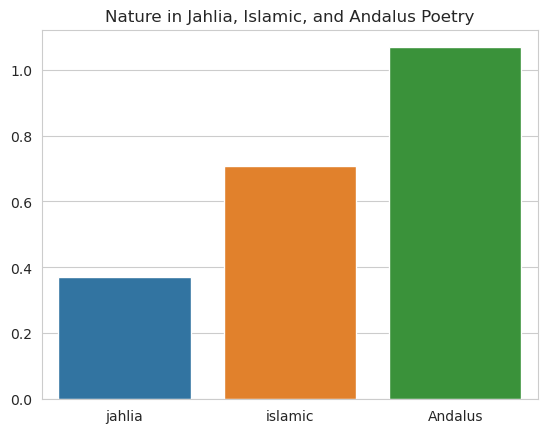

In [ ]:
eras = ['jahlia', 'islamic', 'Andalus']
# compare nature rates in "jahlia", "islamic" and "andalus" poems
rates = [jahli_rate_nature, islamic_rate_nature, andalus_rate_nature]

sns.set_style('whitegrid')
sns.barplot(x=eras, y=rates)
plt.title('Nature in Jahlia, Islamic, and Andalus Poetry')
plt.show()

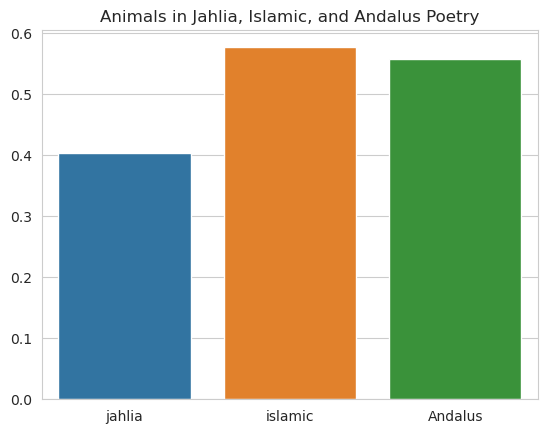

In [ ]:
# compare animals rates in "jahlia", "islamic" and "andalus" poems
rates = [jahli_rate_animal, islamic_rate_animal, andalus_rate_animal]

sns.set_style('whitegrid')
sns.barplot(x=eras, y=rates)
plt.title('Animals in Jahlia, Islamic, and Andalus Poetry')
plt.show()

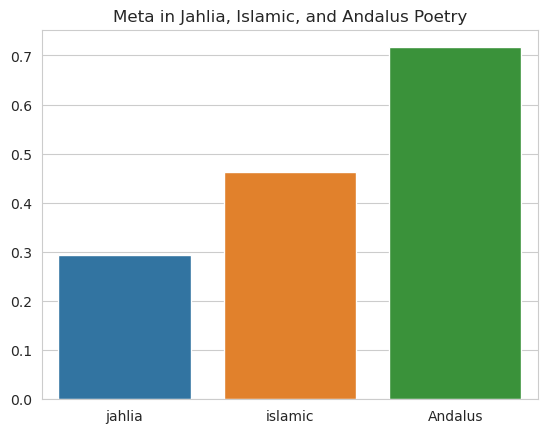

In [ ]:
# compare meta rates in "jahlia", "islamic" and "andalus" poems
rates = [jahli_rate_meta,islamic_rate_meta, andalus_rate_meta]

sns.set_style('whitegrid')
sns.barplot(x=eras, y=rates)
plt.title('Meta in Jahlia, Islamic, and Andalus Poetry')
plt.show()

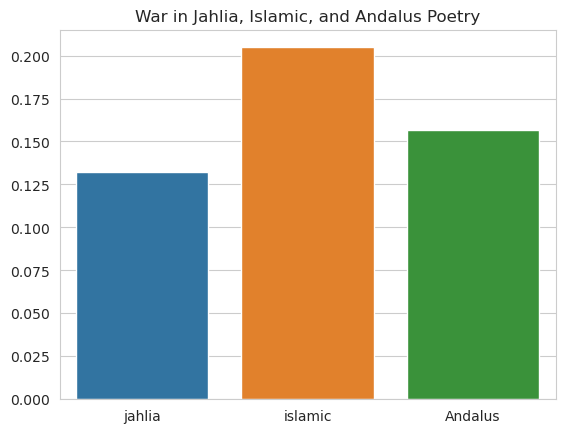

In [ ]:
# compare war rates in "jahlia", "islamic" and "andalus" poems
rates = [jahli_war_rate, islamic_war_rate, andalus_rate_war]

sns.set_style('whitegrid')
sns.barplot(x=eras, y=rates)
plt.title('War in Jahlia, Islamic, and Andalus Poetry')
plt.show()

# Data Preprocessing:

In [ ]:
# explore unique categories in the 1st dataset
result.category.unique()

array(['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي', 'شعراء العراق والشام',
       'أفغانستان', 'إيران'], dtype=object)

In [ ]:
modern = ['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا','شعراء العراق والشام',
       'أفغانستان', 'إيران']
modern

['الإمارات',
 'البحرين',
 'الجزائر',
 'السعودية',
 'السودان',
 'العراق',
 'المغرب',
 'اليمن',
 'تونس',
 'سوريا',
 'عمان',
 'فلسطين',
 'لبنان',
 'ليبيا',
 'مصر',
 'الأردن',
 'الكويت',
 'قطر',
 'موريتانيا',
 'شعراء العراق والشام',
 'أفغانستان',
 'إيران']

In [ ]:
# merge the 22 different countries categories as 'modern' category
for i in range(len(result)):
    if result.iloc[i]['category'] in modern:
        result.iloc[i]['category'] = 'modern'

In [ ]:
result.category.unique()

array(['modern', 'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي'], dtype=object)

Now we have 10 classes: modern + 9 eras. We can start modeling.

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112789 entries, 0 to 112964
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   category    112789 non-null  object
 1   poet_name   112789 non-null  object
 2   poem_title  112789 non-null  object
 3   poem_text   112789 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


In [ ]:
result.category.value_counts()

modern            40520
العصر العباسي     29412
العصر الأندلسي     9533
العصر المملوكي     9056
العصر الايوبي      6062
العصر العثماني     4622
العصر الاموي       4309
العصر الإسلامي     3911
العصر الجاهلي      3337
عصر المخضرمون      2027
Name: category, dtype: int64

# Modeling: 1st method

This first method takes different amounts of time for each step. Here's a breakdown of each step's time complexity:

* Loading the dataset: O(N), where N is the number of rows in the dataset.
* Splitting data into train and test sets: O(1).
* Encoding the target variable: O(N), where N is the number of unique target categories.
* Vectorizing the text data: O(N * M), where N is the number of documents and M is the average length of the documents in terms of tokens.
* Training the logistic regression model: O(C * d * n), where C is the regularization strength, d is the number of features, and n is the number of samples in the training set.
* Predicting the categories of the test data: O(d * m), where d is the number of features and m is the number of samples in the test set.
* Evaluating the performance of the model: O(m), where m is the number of samples in the test set.

In general, the most time-consuming step is training the logistic regression model, which has a time complexity of O(C * d * n). The other steps take less time relatively.

In [ ]:
# Load the dataset
df = result

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['poem_text'], df['category'], test_size=0.2, random_state=42)

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict the categories of the test data
y_pred = model.predict(X_test_vec)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.75      0.86      0.80      8091
           1       0.60      0.22      0.32      1920
           2       0.69      0.33      0.44       736
           3       0.53      0.42      0.47       889
           4       0.52      0.27      0.36      1205
           5       0.42      0.08      0.14       667
           6       0.53      0.82      0.64      5844
           7       0.57      0.22      0.32       950
           8       0.47      0.34      0.39      1834
           9       0.42      0.12      0.19       422

    accuracy                           0.62     22558
   macro avg       0.55      0.37      0.41     22558
weighted avg       0.61      0.62      0.59     22558



In [ ]:
# calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f_score}")
print(f"Recall: {recall}")

Accuracy: 0.6204894050891037
F1 Score: 0.5858490541240394
Recall: 0.6204894050891037


We'll try to improve our modeling by balancing the classes distribution

In [ ]:
# Load the dataset
df = result

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['poem_text'], df['category'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict the categories of the test data
y_pred = model.predict(X_test_vec)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.87      0.72      0.78      8091
           1       0.40      0.44      0.42      1920
           2       0.44      0.66      0.53       736
           3       0.43      0.53      0.47       889
           4       0.37      0.42      0.39      1205
           5       0.31      0.32      0.32       667
           6       0.66      0.52      0.58      5844
           7       0.30      0.54      0.39       950
           8       0.37      0.49      0.42      1834
           9       0.22      0.39      0.28       422

    accuracy                           0.57     22558
   macro avg       0.44      0.50      0.46     22558
weighted avg       0.62      0.57      0.59     22558



In [ ]:
# calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f_score}")
print(f"Recall: {recall}")

Accuracy: 0.5730561219966309
F1 Score: 0.5894833139252075
Recall: 0.5730561219966309


We can see that the first model is better than the second but we still didn't get good result using basic ML classifiers. We'll opt to use transfer learning to see if we can get better results.

# Modeling: 2nd method

In [ ]:
X = result['poem_text']
y = result['category']

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02', do_lower_case=True)

In [ ]:
# encode train data using BERT tokenizer
encoded_data_train = tokenizer.batch_encode_plus(
    X_train.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt',
    truncation=True
)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2345: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# encode test data using BERT tokenizer
encoded_data_test = tokenizer.batch_encode_plus(
    X_test.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt',
    truncation=True
)

In [ ]:
# create PyTorch dataloaders
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.tolist())

In [ ]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(y_test.tolist())

In [ ]:
# combine the input data, attention masks, and labels into a single tensor using TensorDataset
dataset_train = torch.utils.data.TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = torch.utils.data.TensorDataset(input_ids_test, attention_masks_test, labels_test)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=32, shuffle=False)

## Load the model

Due to limited resources (access to GPU), we will train our model for 5 epochs and save the output weights and re-import the trained model again.

In general, initializing a BERT model has a time complexity of O(n^2), where n is the number of parameters in the model. This is because each parameter's weight initialization involves an operation that takes O(n) time.

On the other hand, initializing AdamW optimizer is a simple operation that sets the learning rate, and thus has a time complexity of O(1).

AdamW is a popular optimizer for deep learning tasks, especially for NLP tasks that involve long input sequences. It offers two main advantages:

* Weight decay: AdamW includes a weight decay parameter that applies a penalty term to the loss function, which helps prevent overfitting and improve the model's generalization to new data.

* Sparse gradients: AdamW is effective at handling sparse gradients, which are common in NLP tasks, by adapting the learning rate for each parameter separately. This can result in faster convergence and better model performance compared to other optimization algorithms.

In [ ]:
# initialize BERT model and optimizer
model = BertForSequenceClassification.from_pretrained(
    'aubmindlab/bert-base-arabertv02',
    num_labels = 10,
    output_attentions = False,
    output_hidden_states = False
)
# initialize AdamW optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)
model.to(device)

## Train the model

The time complexity of training a BERT-based model using mini-batch gradient descent is influenced by factors such as the model's size, number of parameters, and batch size.

The outer loop that loops through epochs has a time complexity of O(E), where E is the number of epochs.

The inner loop that processes the batches has a time complexity of O(N/B), where N is the total number of training examples and B is the batch size.

For each batch, the time complexity of processing the inputs using the BERT model and optimizer is O(N^2), where N is the length of the input sequence. This is due to BERT's self-attention mechanism, which performs pairwise comparisons between input tokens, leading to a time complexity of O(N^2).

As a result, the overall time complexity of training the BERT-based model using mini-batch gradient descent is O(E * N^3 / B). Techniques such as gradient accumulation or mixed precision training can further reduce this time complexity.

In [ ]:
# train the model
epochs = 5

for epoch in range(1, epochs+1):
    model.train()
    loss_train_total = 0

    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}


        optimizer.zero_grad()

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        optimizer.step()

    loss_train_avg = loss_train_total/len(dataloader_train)

    print(f'Epoch: {epoch} \t Training Loss: {loss_train_avg}')

In [ ]:
model.save_pretrained("/kaggle/working/model")

After saving the model this way we created a dataset in kaggle to store the pre-trained model's weights. This step will be further explained in the video.

In [ ]:
# Load the 1st fine tuned pre-trained model on 5 epochs
model1 = BertForSequenceClassification.from_pretrained("/kaggle/input/model-arabic-fine-tined/model")
# reset optimizer
optimizer = AdamW(model1.parameters(), lr=1e-5)

'model1 = BertForSequenceClassification.from_pretrained("/kaggle/input/model-arabic-fine-tined/model")\noptimizer = AdamW(model1.parameters(), lr=1e-5) '

In [ ]:
# train the model on the next 5 epochs
epochs = 5

for epoch in range(1, epochs+1):
    model1.train()
    loss_train_total = 0

    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}


        optimizer.zero_grad()

        outputs = model1(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        optimizer.step()

    loss_train_avg = loss_train_total/len(dataloader_train)

    print(f'Epoch: {epoch} \t Training Loss: {loss_train_avg}')

In [ ]:
# save the 2nd model's weights
model_path = '/kaggle/working/model_weights2.pth'
torch.save(model1.state_dict(), model_path)

In this part we tried to save the model in another way. So after saving it with this method we had also to re-read it but with a different method.

In [ ]:
# Load the 2nd fine tuned pre-trained model on 10 epochs

model2 = BertForSequenceClassification.from_pretrained(
        'aubmindlab/bert-base-arabertv02',
        num_labels = 10,
        output_attentions = False,
        output_hidden_states = False)
model2.load_state_dict(torch.load("/kaggle/input/model-arabic-fine-tuned2/model_weights2.pth", map_location=device))
# reset optimizer
optimizer = AdamW(model2.parameters(), lr=1e-5)

'model2 = BertForSequenceClassification.from_pretrained(\n        \'aubmindlab/bert-base-arabertv02\',\n        num_labels = 10,\n        output_attentions = False,\n        output_hidden_states = False)\nmodel2.load_state_dict(torch.load("/kaggle/input/model-arabic-fine-tuned2/model_weights2.pth", map_location=device))\noptimizer = AdamW(model2.parameters(), lr=1e-5) '

In [ ]:
# train the model on the next 5 epochs
epochs = 5

for epoch in range(1, epochs+1):
    model2.train()
    loss_train_total = 0

    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}


        optimizer.zero_grad()

        outputs = model2(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        optimizer.step()

    loss_train_avg = loss_train_total/len(dataloader_train)

    print(f'Epoch: {epoch} \t Training Loss: {loss_train_avg}')

In [ ]:
model2.save_pretrained("/kaggle/working/model")

In [ ]:
# Load the 3rd fine tuned pre-trained model on 15 epochs

model3 = BertForSequenceClassification.from_pretrained("/kaggle/input/model-arabic-fine-tined/model3")
optimizer = AdamW(model3.parameters(), lr=1e-5)

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# train the model on the final 5 epochs
epochs = 5

for epoch in range(1, epochs+1):
    model3.train()
    loss_train_total = 0

    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}


        optimizer.zero_grad()

        outputs = model3(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        optimizer.step()

    loss_train_avg = loss_train_total/len(dataloader_train)

    print(f'Epoch: {epoch} \t Training Loss: {loss_train_avg}')

Epoch: 1 	 Training Loss: 0.09737337435371117
Epoch: 2 	 Training Loss: 0.08509998305263955
Epoch: 3 	 Training Loss: 0.07803929860105883
Epoch: 4 	 Training Loss: 0.07358518353426426
Epoch: 5 	 Training Loss: 0.06705504426122098


In [ ]:
model3.save_pretrained("/kaggle/working/model")

In [ ]:
# Load the final fine tuned trained model on 20 epochs
model3 = BertForSequenceClassification.from_pretrained("/kaggle/input/model-arabic-fine-tined/model")
optimizer = AdamW(model3.parameters(), lr=1e-5)
model3.to(device)

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Test the model

The time complexity of evaluating a BERT-based model on a test set depends on the size of the test set and the length of the input sequences.

The loop that iterates over the test set batches runs for O(N/B) time, where N is the total number of test examples and B is the batch size.

For each batch, the time complexity of processing the inputs using the BERT model is O(T^2), where T is the length of the input sequence. This is because BERT performs self-attention on the input sequence, which requires pairwise comparisons between each pair of input tokens, resulting in a time complexity of O(T^2).

Therefore, the total time complexity of evaluating the BERT-based model on the test set is O(N/B * T^2).

In [ ]:
# evaluate the model on test set
model3.eval()

predictions = []
true_labels = []

for batch in dataloader_test:
    batch = tuple(b.to(device) for b in batch)
    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model3(**inputs)

    logits = outputs[1].detach().cpu().numpy()
    label_ids = inputs['labels'].cpu().numpy()

    predictions.append(logits)
    true_labels.append(label_ids)

# combine results for all batches
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

In [ ]:
# get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# print classification report
print(classification_report(true_labels, predicted_labels))

# calculate and print various evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f_score = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f_score}")
print(f"Recall: {recall}")

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8091
           1       0.47      0.62      0.54      1920
           2       0.63      0.65      0.64       736
           3       0.74      0.55      0.63       889
           4       0.48      0.33      0.39      1205
           5       0.70      0.64      0.67       667
           6       0.69      0.80      0.74      5844
           7       0.51      0.41      0.45       950
           8       0.53      0.44      0.48      1834
           9       0.38      0.35      0.37       422

    accuracy                           0.71     22558
   macro avg       0.60      0.57      0.58     22558
weighted avg       0.71      0.71      0.71     22558

Accuracy: 0.7123415196382658
F1 Score: 0.5791228698159324
Recall: 0.5650695611876857


In [ ]:
# calculate and print various evaluation metrics (we use weighted F1-score since the dataset is highly imbalanced)
accuracy = accuracy_score(true_labels, predicted_labels)
f_score = f1_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f_score}")
print(f"Recall: {recall}")

Accuracy: 0.7123415196382658
F1 Score: 0.7090029465280414
Recall: 0.7123415196382658


In [ ]:
label_encoder1 = LabelEncoder()
true_labels_enc = label_encoder1.fit_transform(true_labels)
predicted_labels_enc = label_encoder1.fit_transform(predicted_labels)

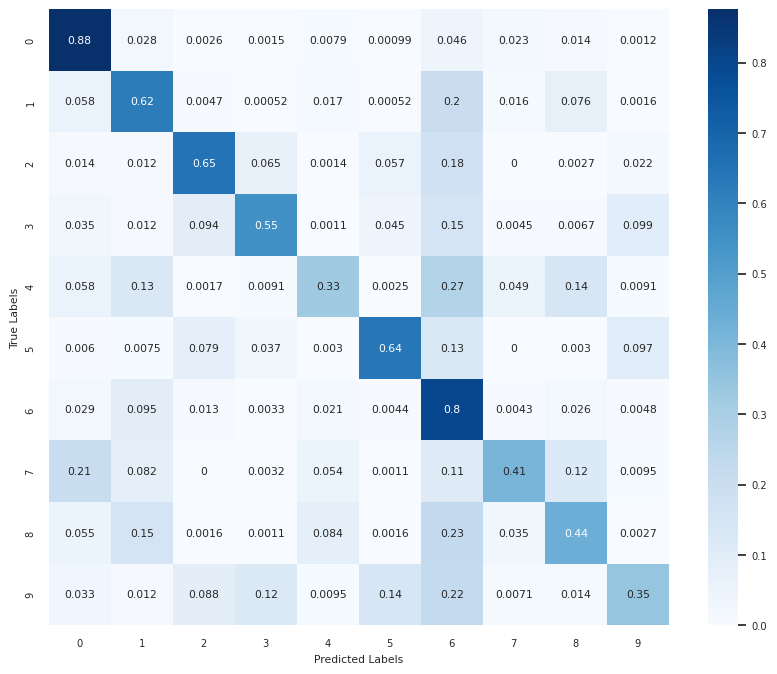

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(true_labels_enc, predicted_labels_enc)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=0.65)
fig, ax = plt.subplots(figsize=(10, 8))  # set the figure size
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=list(range(len(label_encoder.classes_))), yticklabels=list(range(len(label_encoder.classes_))))
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

# Arabic Poetry Generator:

## Importing Modules:

In [ ]:
# !pip install transformers
# !pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.3 MB/s eta 0:00:00










     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.6 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 7.0 MB/s eta 0:00:00








Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.2 MB/s eta 0:00:00







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.3 MB/s eta 0:00:00







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.6 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.4 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.3 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from transformers import pipeline
from tqdm import tqdm
from datasets import load_dataset

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', DEVICE)

Device available now: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading the dataset:

In [ ]:
# !mkdir /root/.kaggle
# !cp -r /content/kaggle.json /root/.kaggle
# !kaggle datasets download -d ahmedabelal/arabic-poetry
# !unzip /content/arabic-poetry.zip
# !cp /content/Arabic_poetry_dataset.csv /content/drive/MyDrive/NLP

## Preparing the dataset and training the model:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Arabic_poetry_dataset.csv')
df.head()

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [ ]:
test_set = df.sample(n = 200)
test_set.head()

,id,category,poet_name,poem_title,poem_text
39680,39854,العصر الاموي,الكميت بن زيد,لا ينبت الناس إلا في أرومتهم,لا ينبت الناس إلا في أرومتهم\nولا ترى ثمر القِ...
22895,23069,العصر العباسي,الأحنف العكبري,حسبي من التريبات والحشم,حسبي من التريبات والحشَمِ\nومن وقوفي بموقف الن...
42257,42431,العصر الاموي,أبو الأسود الدؤلي,زيد مائت كمد الحبارى,زَيدٌ مائِتٌ كَمَدَ الحُبارى\nإِذا ظَعِنَت لَط...
25282,25456,العصر العباسي,الخبز أرزي,إن كان لفظي كريها فاصطبر فعلى,إن كان لفظي كريهاً فاصطبر فعلى\nكره العلاج يصح...
30776,30950,العصر الايوبي,أسامة بن منقذ,لا تغبطن أهل بيت سرهم زمن,لا تَغبِطَنْ أهْلَ بيتٍ سَرّهُمْ زمَنٌ\nفسوفَ ...


In [ ]:
df = df.loc[~df.index.isin(test_set.index)]

In [ ]:
test_set = test_set.reset_index()
df = df.reset_index()

In [ ]:
test_set['True_end'] = test_set['poem_text'].str.split().str[-20:].apply(' '.join)
test_set['poem_text'] = test_set['poem_text'].str.split().str[:-20].apply(' '.join)

In [ ]:
test_set.head()

,index,id,category,poet_name,poem_title,poem_text,True_end
0,39680,39854,العصر الاموي,الكميت بن زيد,لا ينبت الناس إلا في أرومتهم,,لا ينبت الناس إلا في أرومتهم ولا ترى ثمر القِن...
1,22895,23069,العصر العباسي,الأحنف العكبري,حسبي من التريبات والحشم,حسبي من التريبات والحشَمِ ومن وقوفي بموقف الند...,سقمي لكن تشبّهت بالملوك وأب ناء كبار التجّار و...
2,42257,42431,العصر الاموي,أبو الأسود الدؤلي,زيد مائت كمد الحبارى,زَيدٌ مائِتٌ كَمَدَ الحُبارى إِذا ظَعِنَت لَطي...,وَصاحِبُنا لِضَيعَتِها مِضَمُّ سَتَلقى بَعدَها...
3,25282,25456,العصر العباسي,الخبز أرزي,إن كان لفظي كريها فاصطبر فعلى,إن كان لفظي كريهاً فاصطبر فعلى كره العلاج يصحّ...,أُعاتب إخواني وهم ثقتي طوراً وقد تُصقَل الأسيا...
4,30776,30950,العصر الايوبي,أسامة بن منقذ,لا تغبطن أهل بيت سرهم زمن,لا تَغبِطَنْ أهْلَ بيتٍ سَرّهُمْ زمَنٌ فسوفَ ي...,كان يملِكُهُ في ظُلمةِ اللَّحدِ إلاّ خِرقَةُ ا...


In [ ]:
train_set_text = df['poem_text']
test_set_text = test_set['poem_text']
train_set_text = train_set_text.rename('text')
test_set_text = test_set_text.rename('text')
train_set_text.to_csv("/content/drive/MyDrive/NLP/train_set.csv", index=False)
test_set_text.to_csv("/content/drive/MyDrive/NLP/test_set.csv", index=False)

In [ ]:
data_files = {"train": "/content/drive/MyDrive/NLP/train_set.csv", "test": "/content/drive/MyDrive/NLP/test_set.csv"}
dataset = load_dataset('csv', data_files = data_files)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-60e14d8a491f8b3c/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 54744
    })
    test: Dataset({
        features: ['text'],
        num_rows: 200
    })
})

Here we will use the model we already trained for several epochs and that we uploaded to huggingface

In [ ]:
checkpoint = "belgadreamsbig/arabic-poetry-generator"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(examples):
    text = []
    for line in examples["text"]:
        if line:
            if len(line) > 0 and not line.isspace():
                text.append(line)
    return tokenizer(text, truncation = True, max_length = 100, padding = True)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

Map:   0%|          | 0/54744 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask"])

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 54744
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 151
    })
})

In [ ]:
data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )

In [ ]:
model = AutoModelForCausalLM.from_pretrained(checkpoint)

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/NLP", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=2, # number of training epochs
    per_device_train_batch_size=16, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 400, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved
    warmup_steps=500,# number of warmup steps for learning rate scheduler
    prediction_loss_only=True,
    )

In [ ]:
model = model.to(DEVICE)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator = data_collator,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['test'],
)

In [ ]:
trainer.train()

Step,Training Loss
500,2.203200
1000,2.303300
1500,2.321900
2000,2.312700
2500,2.304200
3000,2.331000
3500,2.287300
4000,2.262700
4500,2.253900
5000,2.245300


TrainOutput(global_step=6844, training_loss=2.2724760446821577, metrics={'train_runtime': 3528.1939, 'train_samples_per_second': 31.032, 'train_steps_per_second': 1.94, 'total_flos': 5587566796800000.0, 'train_loss': 2.2724760446821577, 'epoch': 2.0})

## Uploading the model to huggingface:

In [ ]:
from huggingface_hub import login

In [ ]:
login()

In [ ]:
model.push_to_hub('arabic-poetry-generator')
tokenizer.push_to_hub('arabic-poetry-generator')

# Model Evaluation:

In [ ]:
# !pip install evaluate

In [ ]:
import pandas as pd
import evaluate
import warnings
warnings.simplefilter('ignore', UserWarning)

In [ ]:
prompt = 'القدس مدينة تاريخية، بناها الكنعانيون في'

bleu_metric = evaluate.load('bleu')
bleu_metric.compute(references = [[prompt]], predictions = [prompt])

{'bleu': 1.0,
 'precisions': [1.0, 1.0, 1.0, 1.0],
 'brevity_penalty': 1.0,
 'length_ratio': 1.0,
 'translation_length': 6,
 'reference_length': 6}

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/NLP/Arabic_poetry_dataset.csv')
test_ds = ds.sample(20)
test_ds['prompt'] = test_ds['poem_text'].str.split().str[-10:].apply(' '.join)
test_ds['true_end'] = test_ds['poem_text'].str.split().str[:-10].apply(' '.join)
test_ds = test_ds[['prompt', 'true_end']].reset_index()
test_ds.head()

,index,prompt,true_end
0,15559,وبالشَّبُّوطِ والفَرْخِ وبالبِكْر التي لم تَشـ...,متى عهدُك بالكرْخِ
1,18270,حارِثُ يُذَكِّرُنا بُعدُ الفِراقِ عُهودَهُ وَت...,وَما هُوَ إِلّا أَن جَرَت بِفِراقِنا يَدُ الدَ...
2,5869,مما دهما فعلى سيدهم هادي الورى كلما صلى تعالى ...,خل خلي من الى الغي انتمى وتباعد عن جهول ظلما و...
3,54096,وبِشِبهي قلتُ يا ليتَني شَبِيهك قالت إنّما يَق...,ما هجرتُ الْمُدامَ والوَرْدَ والبَد رَ بطَوْعٍ...
4,47684,بكت مقلتي العبرى وأسياف جفنه من التيه في أغماد...,بروحيَ تيّاهٌ يحلّل أدمعي وكيف يحلّ الماء أكثر...


In [ ]:
generator = pipeline('text-generation', model = checkpoint)
generations = []
for i, prompt in enumerate(test_ds['prompt']):
    generations.append(generator(prompt, max_length = 100, num_return_sequences = 1, pad_token_id = 50256)[0]['generated_text'])

In [ ]:
for i in range(len(test_ds)):
    if test_ds['true_end'][i]: print(bleu_metric.compute(references = [[test_ds['true_end'][i]]], predictions = [generations[i]]))

{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 5.666666666666667, 'translation_length': 17, 'reference_length': 3}

{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 12, 'reference_length': 12}

{'bleu': 0.0, 'precisions': [0.0967741935483871, 0.01639344262295082, 0.0, 0.0], 'brevity_penalty': 0.18092414583249508, 'length_ratio': 0.36904761904761907, 'translation_length': 62, 'reference_length': 168}

{'bleu': 0.0, 'precisions': [0.17647058823529413, 0.0, 0.0, 0.0], 'brevity_penalty': 0.27413964557012743, 'length_ratio': 0.4358974358974359, 'translation_length': 17, 'reference_length': 39}

{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 4.555555555555555, 'translation_length': 41, 'reference_length': 9}

{'bleu': 0.0, 'precisions': [0.04, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 3.5714285714285716, 'translation_length': 

# Bibliography

**Datasets:**
* Arabic Poetry : [link](https://www.kaggle.com/datasets/ahmedabelal/arabic-poetry)
* Arabic Poetry Dataset (6th - 21st century) : [link](https://www.kaggle.com/datasets/fahd09/arabic-poetry-dataset-478-2017)

**Words Datasets:**
* Meta_words : [link](https://www.kaggle.com/datasets/mohamedezzeldien/meta-words)
* Animals and Nature : [link](https://www.kaggle.com/datasets/mohamedezzeldien/words)
* War : [link](https://www.kaggle.com/datasets/jawherjabri/words-arabic)

**Finetuned model:**
* Bert base AraBERT : [link](https://huggingface.co/aubmindlab/bert-base-arabertv02)
* 5 epochs : [link](https://www.kaggle.com/datasets/jawherjabri/model-arabic-fine-tined) :  Version 1
* 10 epoch : [link](https://www.kaggle.com/datasets/firasmeddeb/model-arabic-fine-tuned2): Version 1
* 15 epochs : [link](https://www.kaggle.com/datasets/jawherjabri/model-arabic-fine-tined) :  Version 4
* 20 epochs : [link](https://www.kaggle.com/datasets/jawherjabri/model-arabic-fine-tined) :  Version 5

